In [42]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", None)  # Display all columns

plt.style.use("ggplot")

# Exploring the data

First thing to do is to inspect the data, undertake basic exploration, check for missing data, and think about potential transformations that may help us in making predictions. 

In [43]:
raw_data_dir = Path(Path.cwd().parent, "data", "raw")
input_fname = Path(raw_data_dir, "dataset.csv")
df = pd.read_csv(input_fname, low_memory=False)

In [44]:
df.head()

,SALESFORCEACCOUNTID,ACCOUNTING_MONTH,RENEWAL_MONTH,CONTRACT_START_DATE,REGION,SECTOR,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN
0,0011N00001hBZM7QAO,2021-10-01 00:00:00+00:00,2021-12-01T00:00:00Z,2020-12-24T00:00:00Z,UKI,Professional Services,126,NaN,NaN,364,27241.17,330,0,1.015152,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,21,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
1,0011N00001hBZM7QAO,2021-11-01 00:00:00+00:00,2021-12-01T00:00:00Z,2020-12-24T00:00:00Z,UKI,Professional Services,127,NaN,NaN,364,27241.17,330,0,1.021212,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,22,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
2,0011N00001hBZM7QAO,2021-12-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,128,NaN,NaN,364,30349.76,350,0,0.940000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
3,0011N00001hBZM7QAO,2022-01-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,129,NaN,NaN,364,30349.76,350,0,0.960000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,1,0,0,0,0,0,0,0,0,0,0,116598,0,0,0,11525,362,4,14,1892,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
4,0011N00001hBZM7QAO,2022-02-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,130,NaN,NaN,364,30349.76,350,0,0.940000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,40704,0,0,0,3804,194,17,4,737,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 82 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SALESFORCEACCOUNTID                   100000 non-null  object 
 1   ACCOUNTING_MONTH                      100000 non-null  object 
 2   RENEWAL_MONTH                         100000 non-null  object 
 3   CONTRACT_START_DATE                   100000 non-null  object 
 4   REGION                                100000 non-null  object 
 5   SECTOR                                84930 non-null   object 
 6   TENURE_MONTHS                         100000 non-null  int64  
 7   DNB_GLOBAL_SALES_REVENUE              61863 non-null   float64
 8   DNB_GLOBAL_EMPLOYEE_COUNT             61863 non-null   float64
 9   CONTRACT_LENGTH                       100000 non-null  int64  
 10  ARR                                   100000 non-null  float64
 11  S

Initial thoughts:
1. Missing data in columns 5,7,8,78, 79, 80 will have to be either imputed or dropped
2. "ACCOUNTING_MONTH", "RENEWAL_MONTH", "CONTRACT_START_DATE" are likely to need converted to datetime objects
3. Seems like we have repetition in the "SALESFORCEACCOUNTID". According to the instructions this is a unique customer identifier, so we are dealing with less that 100,000 customers. 

In [46]:
num_unique_customers = len(df["SALESFORCEACCOUNTID"].unique())
num_unique_customers

3336

In [47]:
df.describe()

,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN
count,100000.000000,6.186300e+04,6.186300e+04,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,1190.000000,365.000000,2444.000000,100000.000000
mean,43.069110,3.049351e+09,7.569068e+03,394.787380,2.497715e+04,839.213360,79.165750,0.687032,0.872780,0.554010,0.157250,0.514190,0.853340,0.182790,0.00972,0.009200,0.937680,0.293340,0.078530,0.003210,0.023350,0.673970,0.001280,0.023860,0.054240,0.195320,0.154170,0.029560,0.0,0.0,0.000110,0.127650,0.000700,0.085270,0.046470,0.003020,0.015040,0.151310,3.176640,4.124640,1.466250,4.142670,0.003530,0.001120,0.003700,0.010380,0.006840,0.00690,0.327410,0.064780,0.115540,0.015770,3.969551e+04,4.315370,0.004760,0.000440,1.526064e+03,8.878767e+02,5.762740,29.245010,124.81959,3.236970,3.335960,230.784030,11.480216,0.000260,0.001470,0.000760,0.00595,0.693800,0.112490,0.710370,3.854205,7.671233,1.884990,0.006700
std,33.474739,2.298173e+10,7.891647e+04,191.093602,7.808207e+04,5141.421066,541.602022,5.335789,0.333221,0.497077,0.364038,0.499801,0.353768,0.386496,0.09811,0.095475,0.241737,0.455295,0.269005,0.056566,0.151013,0.468761,0.035754,0.152614,0.226492,0.396449,0.361113,0.169371,0.0,0.0,0.010488,0.333911,0.026448,0.279284,0.210597,0.072876,0.137891,0.690406,7.034729,4.360022,5.348464,4.194617,0.059309,0.033448,0.060715,0.101353,0.082421,0.08278,0.469271,0.246138,0.319674,1.081385,1.553936e+06,62.915409,0.068829,0.020972,1.276661e+04,2.001648e+04,55.754312,799.757938,3212.78762,61.808063,19.923056,1387.088712,26.275033,0.018437,0.044809,0.031614,0.08423,1.500201,0.454112,3.898925,0.936484,2.934518,0.413348,0.081579
min,-1.00000

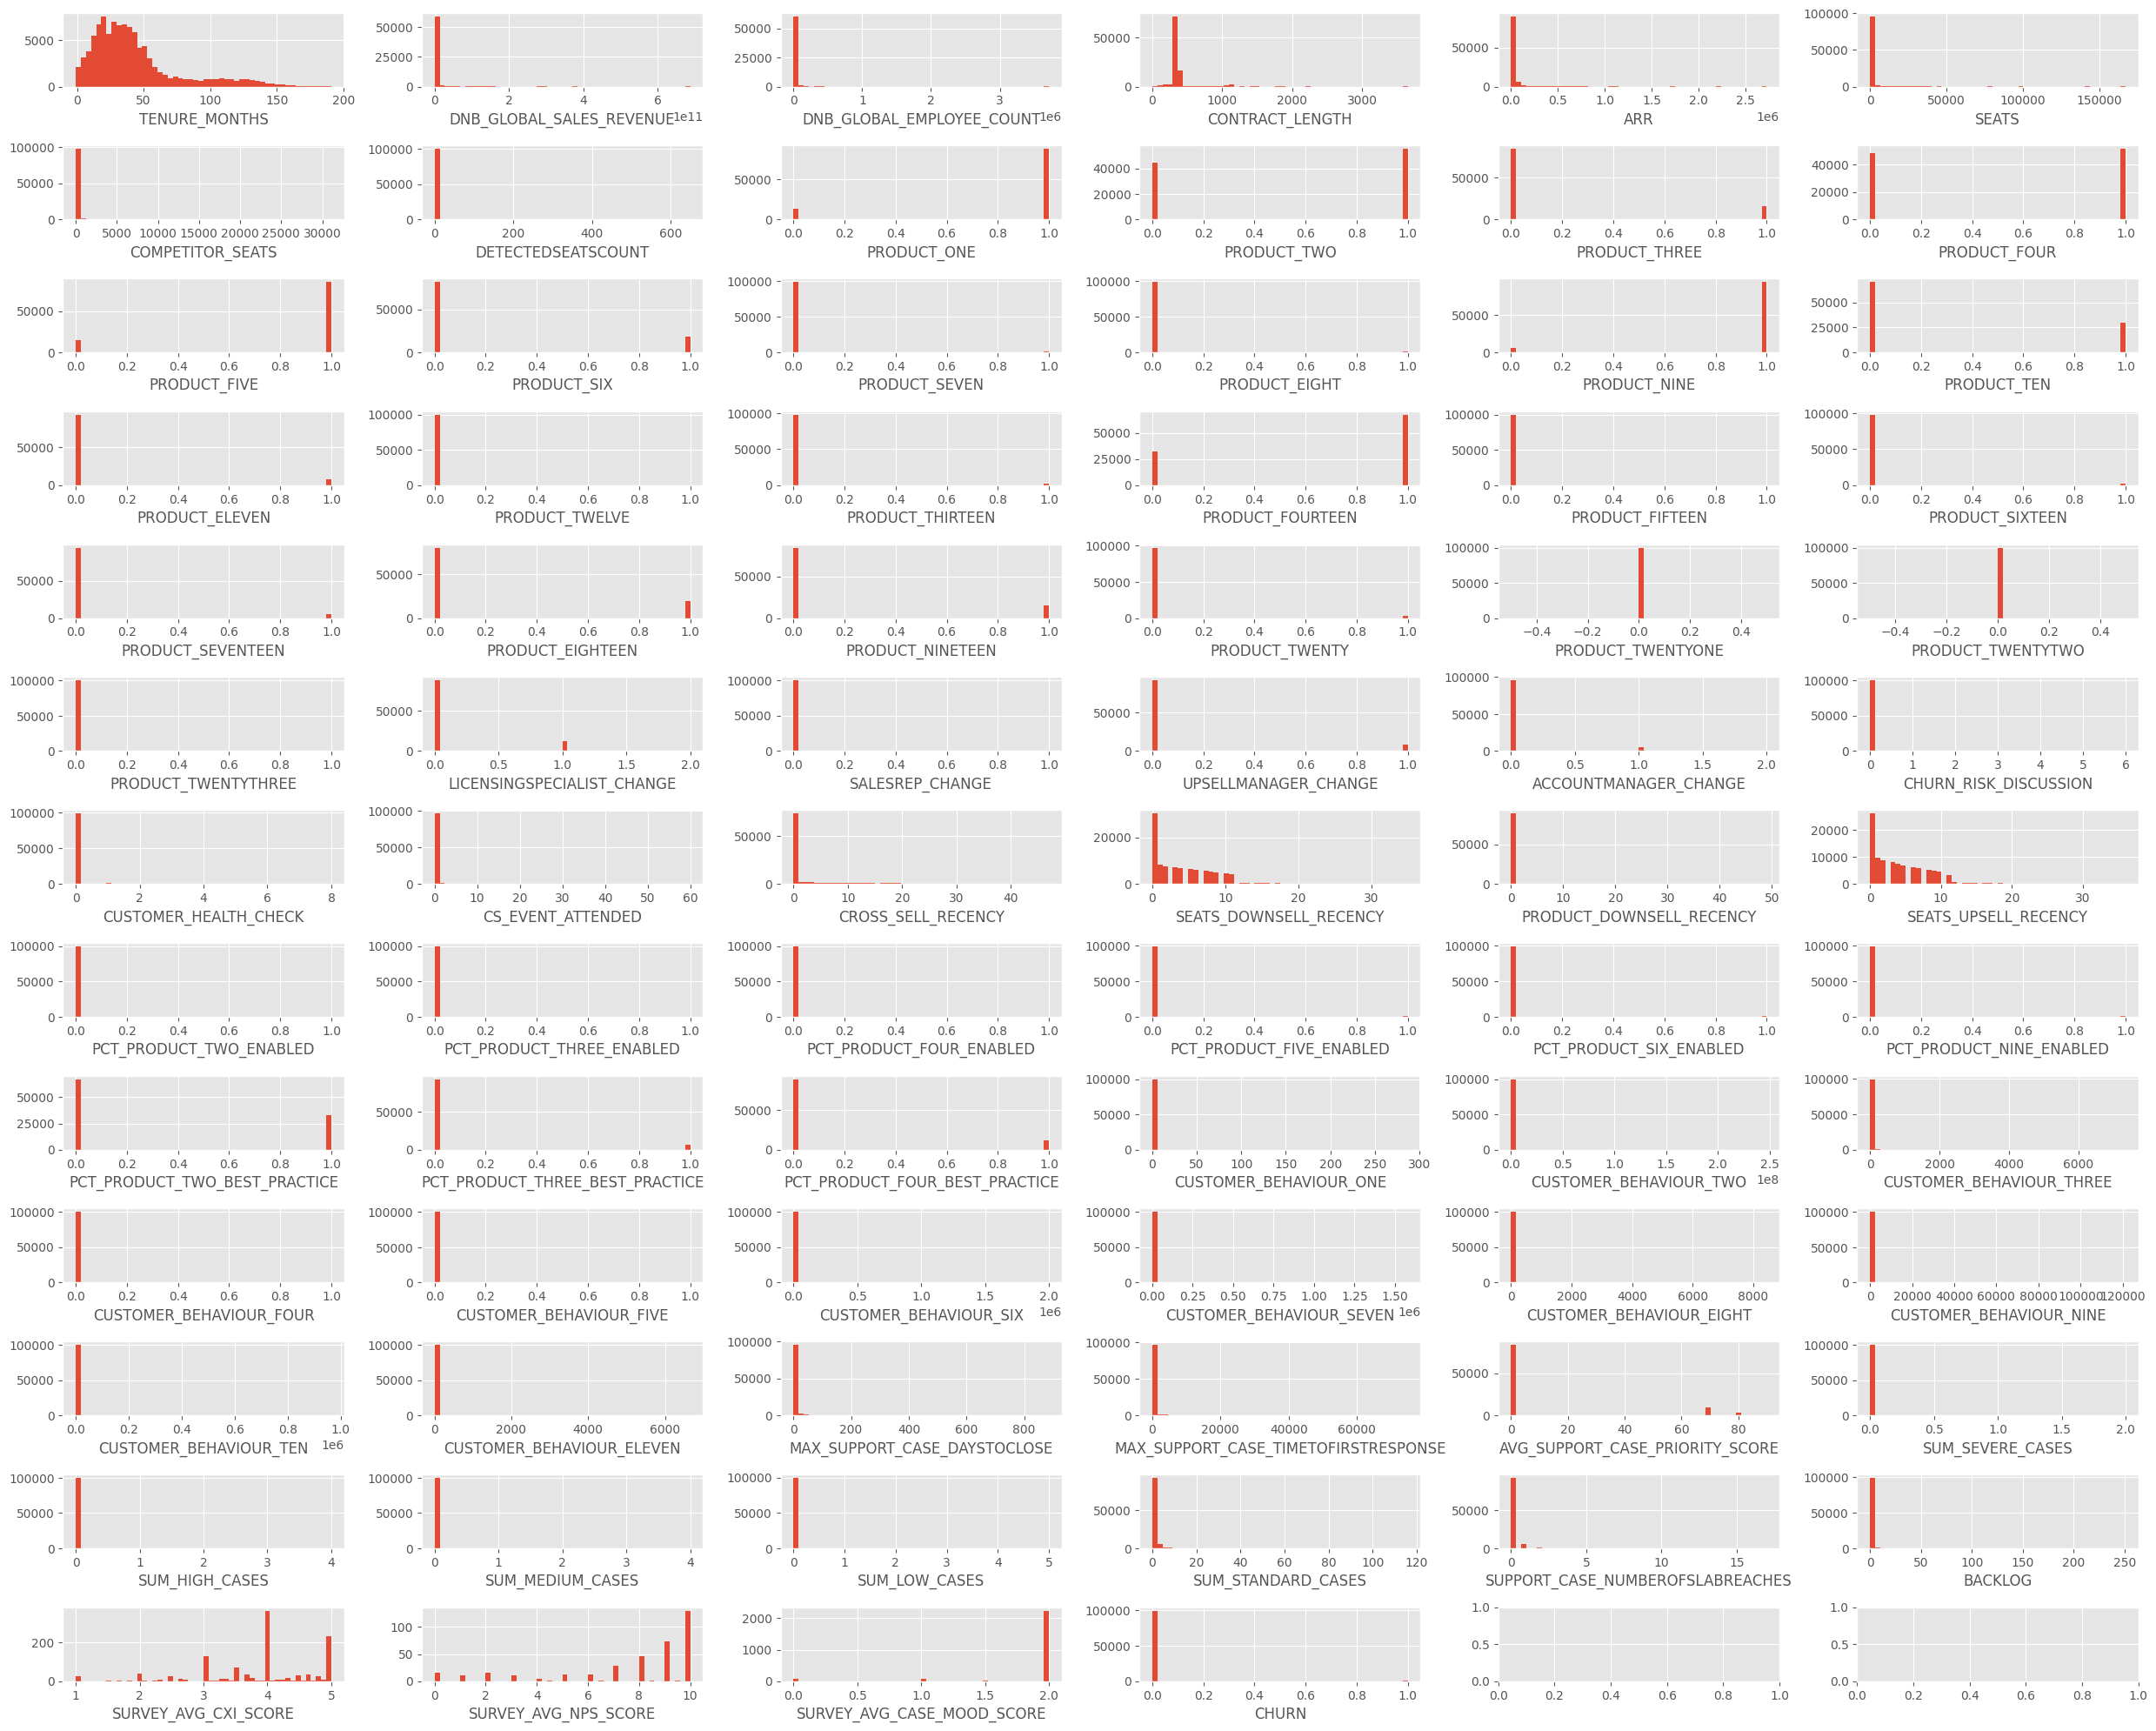

In [48]:
df_numeric = df.select_dtypes(include="number")
len(df_numeric.columns)
fig, axes = plt.subplots(nrows=13, ncols=6, figsize=(25, 20))
axes = np.ravel(axes)
for ax, col in zip(axes, df_numeric.columns):
    ax.hist(df[col], bins=50)
    ax.set(xlabel=col)
plt.tight_layout()

A lot of features are tail heavy, i.e they extend to the right of the median. This indicates some transformations may be required later to make them more more Gaussian like. 

In [49]:
df[df["CUSTOMER_BEHAVIOUR_TEN"] == df["CUSTOMER_BEHAVIOUR_TEN"].max()]

,SALESFORCEACCOUNTID,ACCOUNTING_MONTH,RENEWAL_MONTH,CONTRACT_START_DATE,REGION,SECTOR,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN
95573,0011N00001aYhGlQAK,2022-01-01 00:00:00+00:00,2023-08-01T00:00:00Z,2021-08-28T00:00:00Z,UKI,Health & Social Care,144,1.231390e+09,2918.0,729,279584.19,4000,0,0.8715,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,28,5,0,0,0,0,0,0,1,0,0,0,1080006,12,0,0,9811,10901,20,67,964504,5,93,383,60.0,0,0,0,0,4,1,2,NaN,NaN,NaN,0


In [50]:
df["CHURN"].value_counts()

CHURN
0    99330
1      670
Name: count, dtype: int64

In [51]:
100 * (df["CHURN"].value_counts()[1] / len(df))

0.67

Dataset is highly imbalanced with only 0.67% of the data having positive targets. 

Let's look at some sample data of where churn is occuring and check for any noticeable correlations

In [52]:
df_churned = df[df["CHURN"] == 1]
df_churned.shape

(670, 82)

In [53]:
df_churned.sample(5)

,SALESFORCEACCOUNTID,ACCOUNTING_MONTH,RENEWAL_MONTH,CONTRACT_START_DATE,REGION,SECTOR,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN
79014,0011N00001aYYM0QAO,2021-06-01 00:00:00+00:00,2021-05-01T00:00:00Z,2020-06-01T00:00:00Z,RSA,Professional Services,36,NaN,NaN,364,0.0,1,0,1.00000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,1
13836,0011N00001iMoNYQA0,2020-07-01 00:00:00+00:00,2020-07-01T00:00:00Z,2019-07-30T00:00:00Z,UKI,"Travel, Hospitality & Catering",36,NaN,NaN,365,0.0,92,0,0.00000,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,2,0,0,NaN,NaN,NaN,1
31951,0011N00001aYk9wQAC,2020-02-01 00:00:00+00:00,2020-08-01T00:00:00Z,2019-09-01T00:00:00Z,UKI,"Transportation, Storage & Delivery",17,NaN,NaN,365,0.0,181,161,0.78453,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,2,0,0,NaN,NaN,NaN,1
32319,0011N00001aYkAUQA0,2021-10-01 00:00:00+00:00,2021-10-01T00:00:00Z,2020-10-09T00:00:00Z,UKI,Manufacturing,36,NaN,NaN,364,0.0,35,0,0.00000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,1
78736,0011N00001aYYLdQAO,2022-04-01 00:00:00+00:00,2022-04-01T00:00:00Z,2021-04-30T00:00:00Z,RSA,Government,58,NaN,NaN,364,0.0,39,0,0.00000,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,326,80.0,0,0,0,0,1,1,1,NaN,NaN,NaN,1


All customers that have churned seem to have an ARR value of zero which is odd, let's compare to the entire dataset

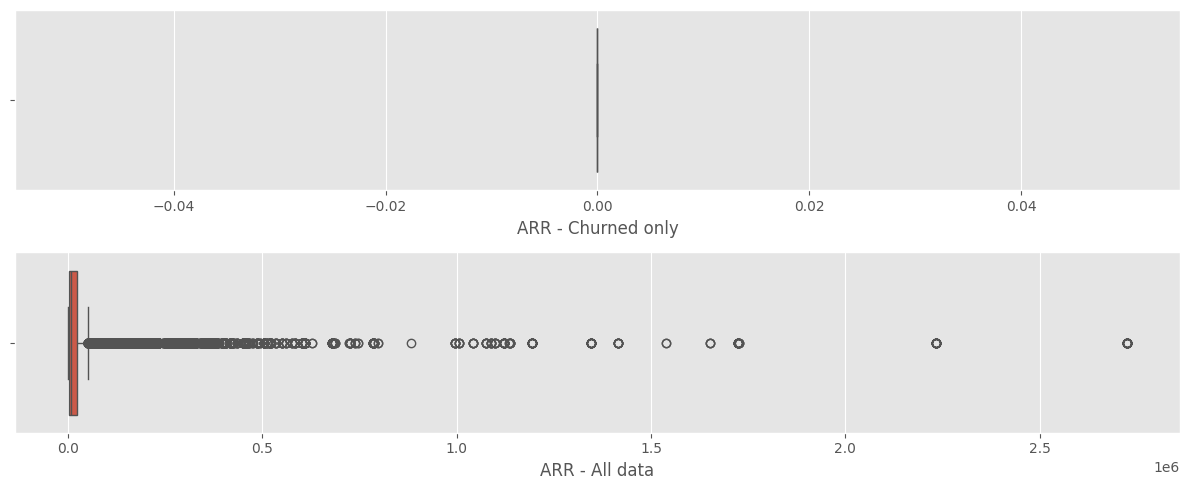

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5))
axes = np.ravel(axes)
sns.boxplot(data=df_churned, x="ARR", ax=axes[0])
sns.boxplot(data=df, x="ARR", ax=axes[1])
axes[0].set(xlabel="ARR - Churned only")
axes[1].set(xlabel="ARR - All data")
plt.tight_layout()

This is very strange, I wonder if the ARR is being set to zero when the customer churnns. Let's look at a few examples of customers who have left in the months up to their churn. 

In [55]:
churned_customer_ids = df[df["CHURN"] == 1]["SALESFORCEACCOUNTID"].unique()
df_churned_customer_subset = df[
    df["SALESFORCEACCOUNTID"].isin(churned_customer_ids[:2])
]
df_churned_customer_subset[["SALESFORCEACCOUNTID", "ARR", "CHURN"]]

,SALESFORCEACCOUNTID,ARR,CHURN
19,0011N00001hBZM8QAO,24869.60,0
20,0011N00001hBZM8QAO,24869.60,0
21,0011N00001hBZM8QAO,0.00,1
22,0011N00001hBZM8QAO,23606.78,0
23,0011N00001hBZM8QAO,23606.78,0
24,0011N00001hBZM8QAO,23606.78,0
25,0011N00001hBZM8QAO,23606.78,0
26,0011N00001hBZM8QAO,23606.78,0
27,0011N00001hBZM8QAO,23606.78,0
28,0011N00001hBZM8QAO,23606.78,0


As suspected, it appears the ARR gets marked as 0 when the customer leaves. This may skew the model and require backfilled with another value, we can attempt to remedy this in the cleaning phase. For now let's check out any correlations with the target. 

In [56]:
corr = df_numeric.corr()
corr["CHURN"].sort_values(ascending=False)

CHURN                         1.000000
CUSTOMER_BEHAVIOUR_FOUR       0.202693
SEATS_DOWNSELL_RECENCY        0.035692
DETECTEDSEATSCOUNT            0.021347
SURVEY_AVG_CASE_MOOD_SCORE    0.016919
                                ...   
PRODUCT_ONE                  -0.033021
SURVEY_AVG_NPS_SCORE         -0.047777
SEATS_UPSELL_RECENCY         -0.068108
PRODUCT_TWENTYONE                  NaN
PRODUCT_TWENTYTWO                  NaN
Name: CHURN, Length: 76, dtype: float64

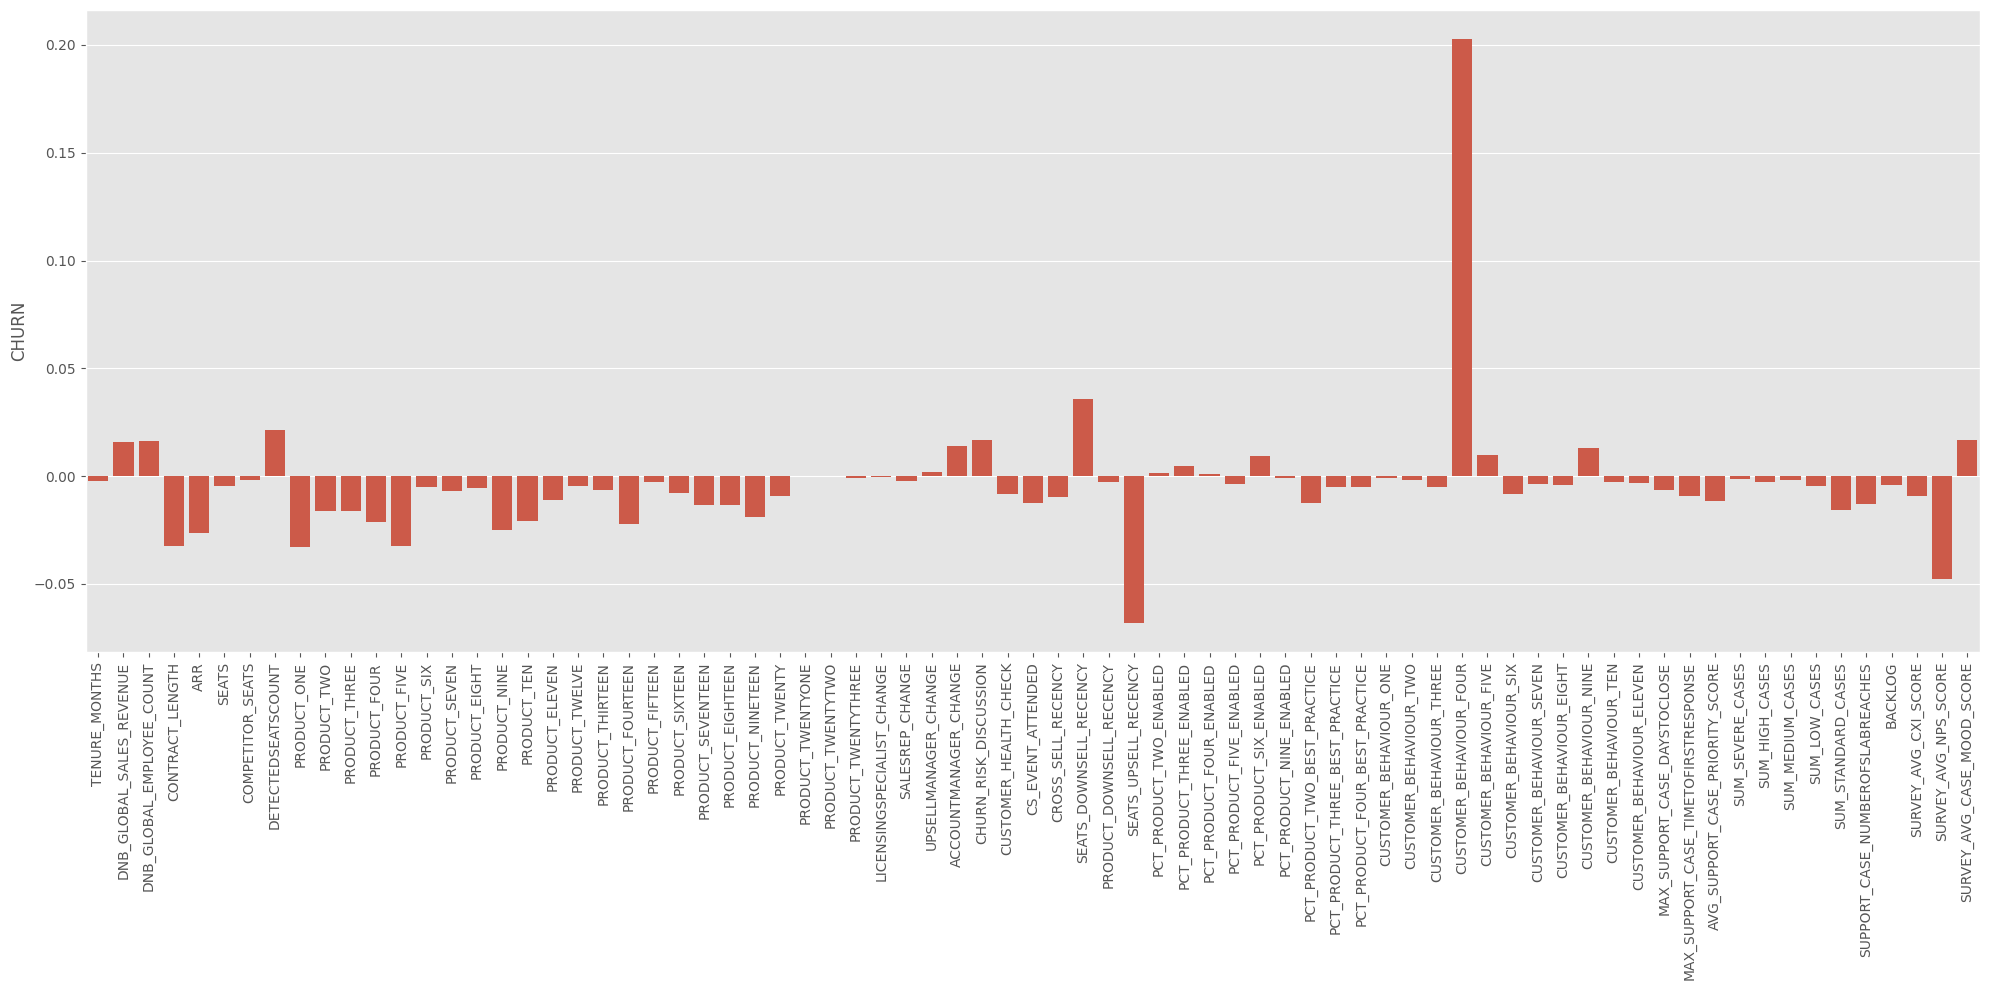

In [57]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(corr["CHURN"].drop("CHURN"), ax=ax)
plt.xticks(rotation=90)
plt.tight_layout();

"CUSTOMER_BEHAVIOUR_FOUR" has a positive correlation with churn, however a value of 0.2 is nothing special. 

## Outlier Detection

Box plots can be a helpful way of identifying if we have outliers, however we aren't interested in the boolean columns so will filter these out first. 

In [58]:
bool_vals = [0, 1]
df_numeric_non_bool_cols = []
for col in df_numeric.columns:
    if not df_numeric[col].isin(bool_vals).all():
        df_numeric_non_bool_cols.append(col)


df_numeric_non_bool = df_numeric[df_numeric_non_bool_cols]

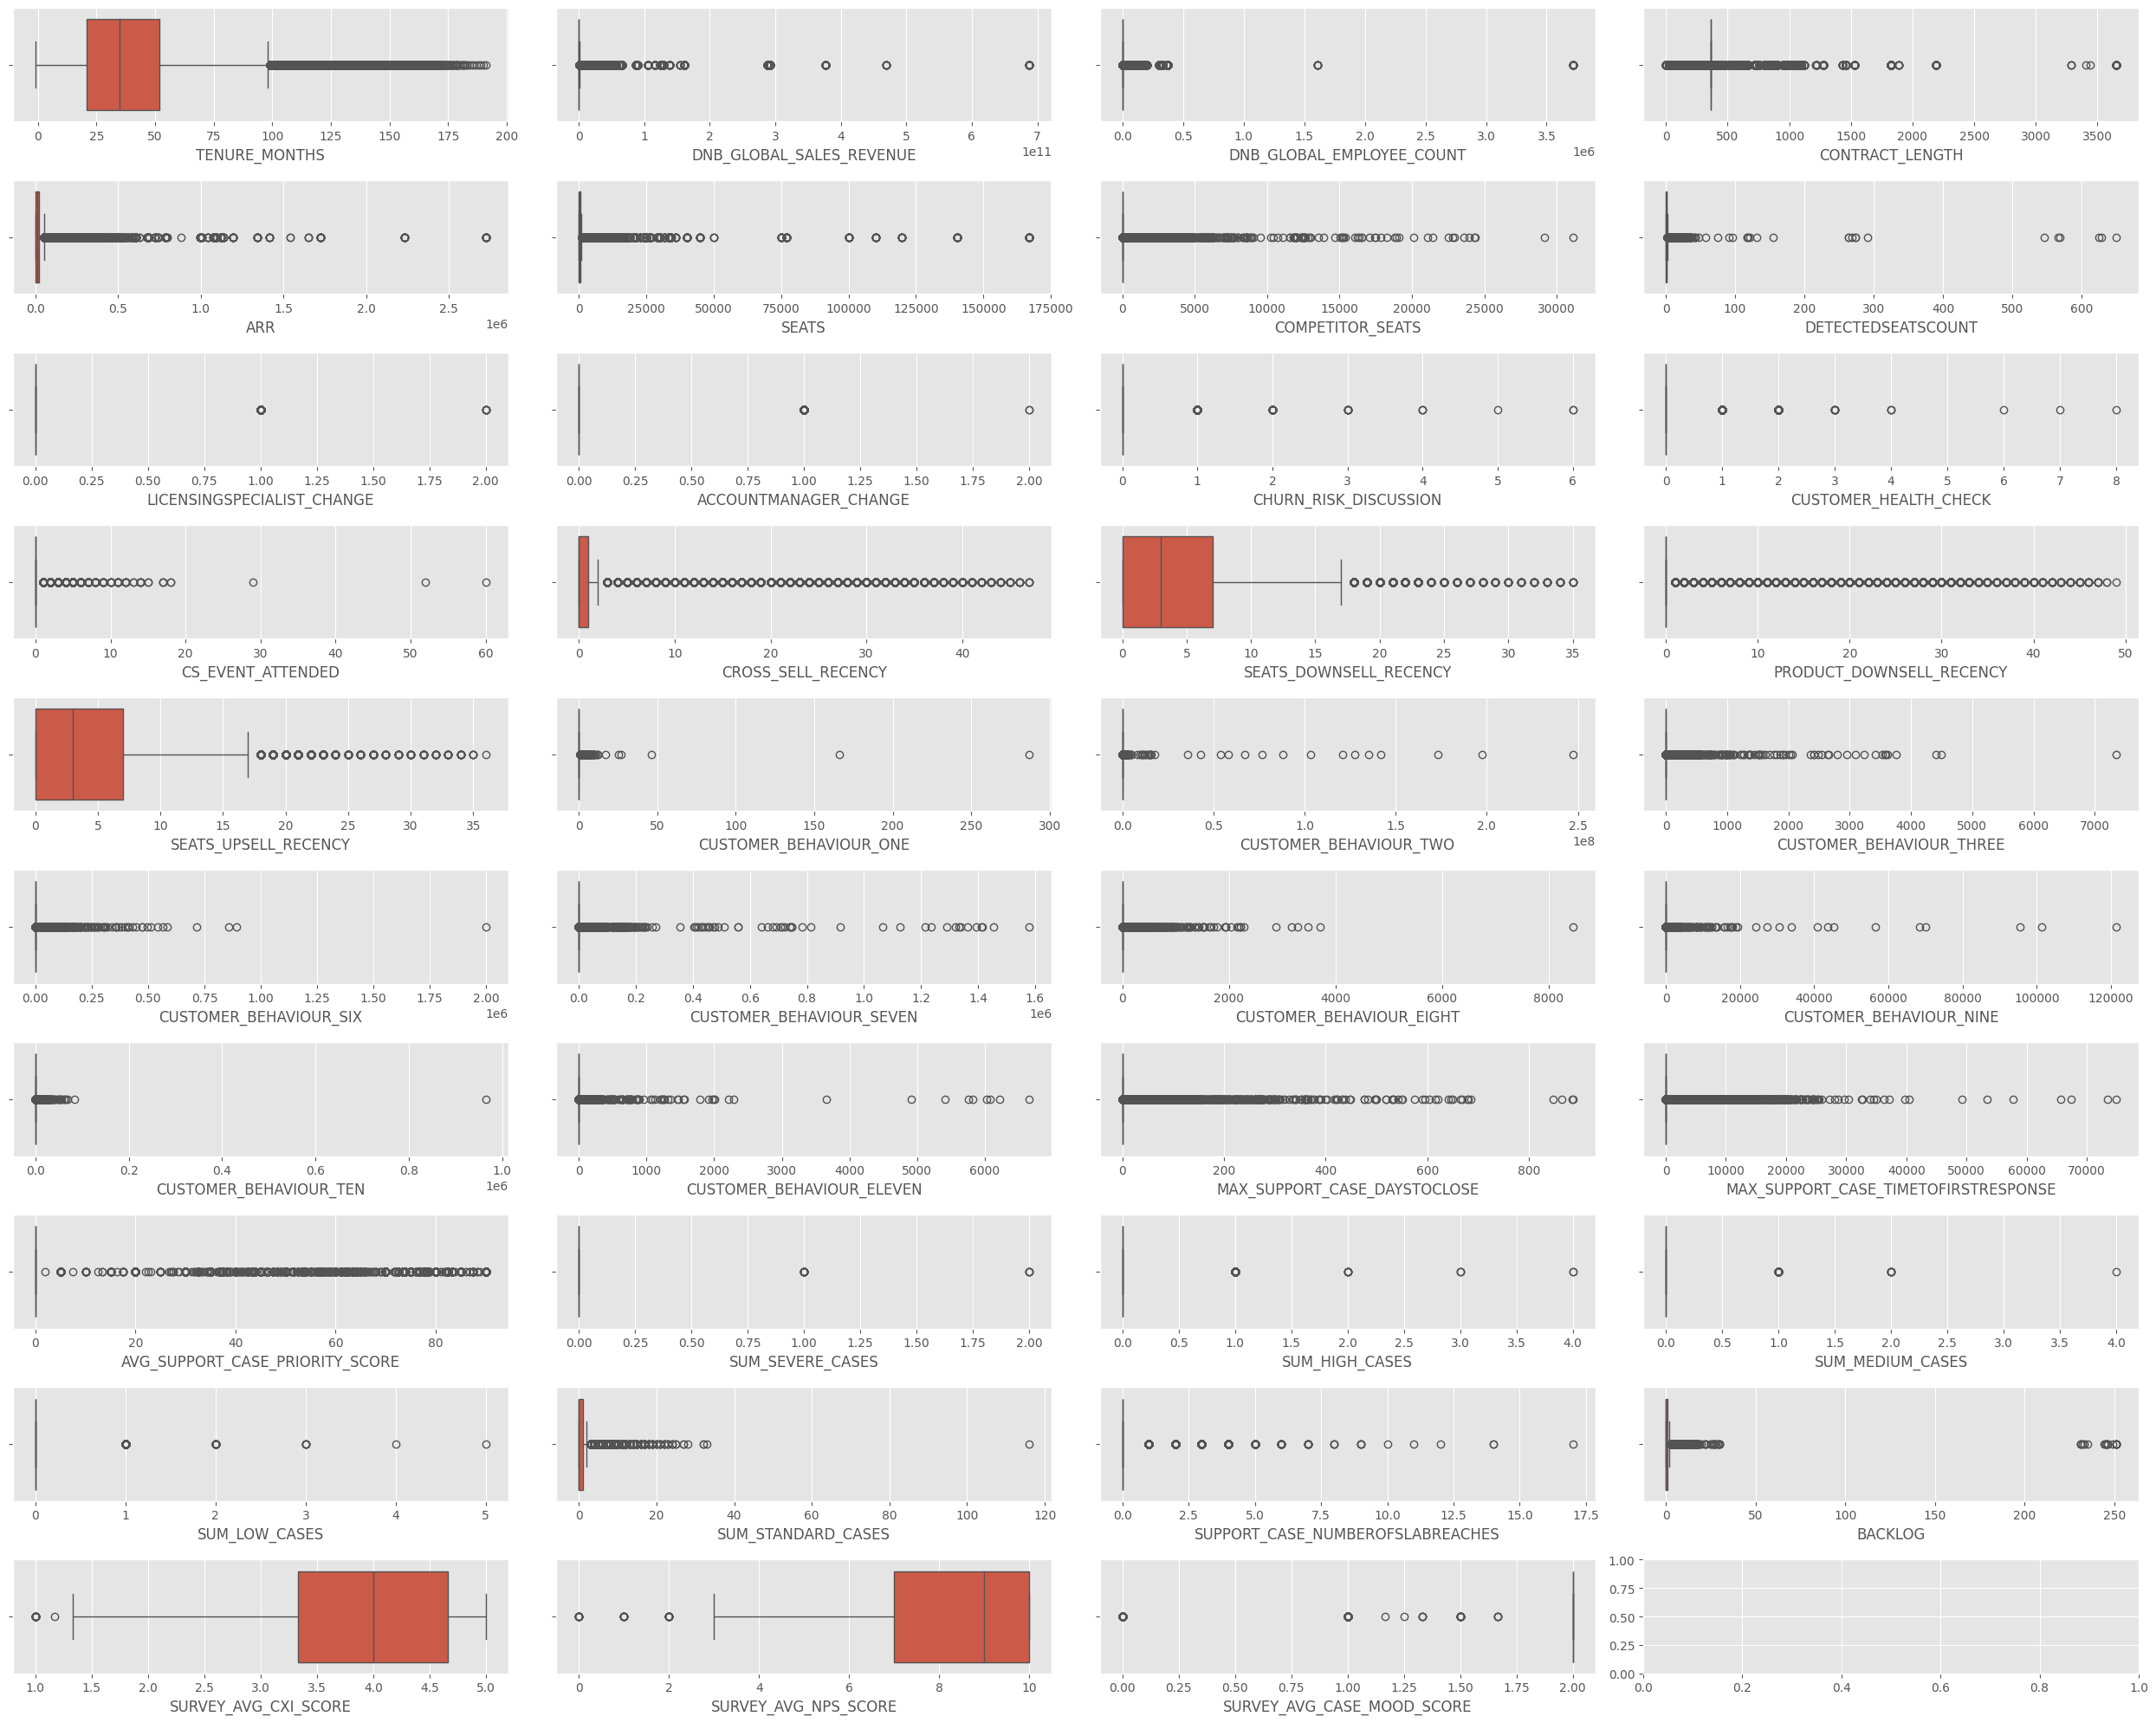

In [59]:
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(25, 20))
axes = np.ravel(axes)
for ax, col in zip(axes, df_numeric_non_bool.columns):
    sns.boxplot(data=df_numeric_non_bool, x=col, ax=ax)
    ax.set(xlabel=col)
plt.tight_layout()

Im not going to remove outliers immediately, as some such as the cluster in the "backlog" chart, will likely correlate with a higher churn (very high backlog -> more likely to leave). But it's something to cosider if the initial modelling does not yield decent results. 